In [212]:
import numpy as np
import sympy as sp
import control  
import control.matlab
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg

In [213]:
#  Matrizes do Sistema
#  A partir do slide 9 da apresentação EE02
A = np.matrix('0 1;0 -2');
B = np.matrix('0;1');
C = np.matrix('1 0');
D = 0;

In [214]:
K = np.matrix('25 5')
Ke = np.matrix('198; 9604')

ki = K[0, 0]

# simulação com discretização dos integradores
# I(z)=T/(z-1)=Xi(z)/Xi_ponto(z)
# xi(k)=T*xi_ponto(k-1)+xi(k-1)

T = 0.01;
tfinal = 5;
Kmax = int(tfinal/T+1);
k = np.linspace(0, Kmax, Kmax+1)
ref = np.ones(len(k));

x1 = np.zeros(len(k))
x2 = np.zeros(len(k))

x1_ponto = np.zeros(len(k))
x2_ponto = np.zeros(len(k))

xtil1 = np.zeros(len(k))
xtil2 = np.zeros(len(k))

xtil1_ponto = np.zeros(len(k))
xtil2_ponto = np.zeros(len(k))

y = C[0,0]*x1

ytil = C[0,0]*x1_til

erro = np.zeros(len(k))

u = np.zeros(len(k))

In [215]:
    for j in range(1,Kmax+1):
    # sistema original
        # Equações dos integradores
        x1[j]=T*x1_ponto[j-1]+x1[j-1];
        x2[j]=T*x2_ponto[j-1]+x2[j-1];    

        xtil1[j]=T*xtil1_ponto[j-1]+xtil1[j-1]; 
        xtil2[j]=T*xtil2_ponto[j-1]+xtil2[j-1]; 

        # equação de saída do observador de ordem mínima
        # Equação de Saída: Y=C*X+D*U
        y[j] = C[0,0]*x1[j]
        ytil[j] = C[0,0]*xtil1[j]
        
        erro[j] = ref[j] - xtil1[j];
        
        u[j] = -(K[0,1]*xtil2[j]) + (ki*(erro[j]));
        # Equação diferencial de estados:  Xponto=A*X+B*U
        x1_ponto[j] = A[0,0]*x1[j]+A[0,1]*x2[j]+B[0]*u[j];  
        x2_ponto[j] = A[1,0]*x1[j]+A[1,1]*x2[j]+B[1]*u[j]; 

        
        xtil1_ponto[j] = A[0,0]*xtil1[j]+A[0,1]*xtil2[j]+B[0]*u[j] + Ke[0]*(y[j] - ytil[j]);  
        xtil2_ponto[j] = A[1,0]*xtil1[j]+A[1,1]*xtil2[j]+B[1]*u[j] + Ke[1]*(y[j] - ytil[j]); 
        
       

In [216]:
matriz_expandida_A = np.block([A-B*K])

print(matriz_expandida_A)

matriz_expandida_B = np.matrix(B*ki)
print(matriz_expandida_B)

matriz_expandida_C = np.block([1,0])
print(matriz_expandida_C)

sistema_final = control.ss(matriz_expandida_A,matriz_expandida_B,matriz_expandida_C,D);

#  Condições Iniciais
x0 = np.matrix('0; 0');
t = np.linspace(0, tfinal, 1000);
ref = np.ones(len(t))
#ref = np.ones(len(t));

# resposta para entrada degrau unitario
Y, t, X = control.matlab.lsim(sistema_final,ref,t,x0);

# separando os elemntos do vetor X
x1a = X[:,0];
x1b = X[:,1];

[[  0   1]
 [-25  -7]]
[[ 0]
 [25]]
[1 0]


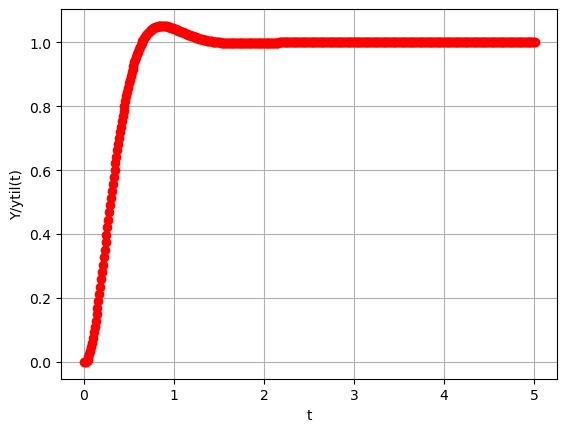

In [217]:
plt.figure()
plt.plot(t, Y,k*T,y,'*', k*T, ytil, 'ro')
plt.xlabel("t")
plt.ylabel("Y/ytil(t)")
plt.grid(True)
plt.show()

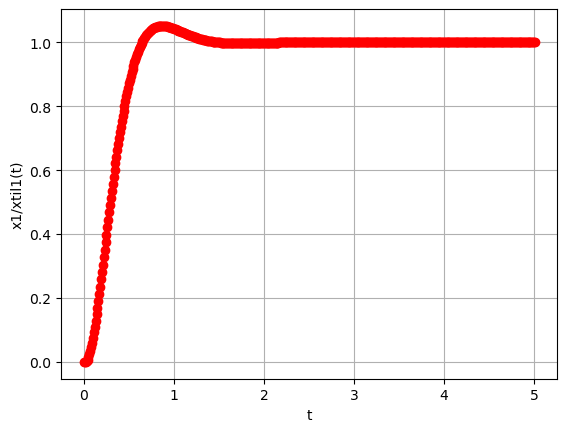

In [218]:
plt.figure()
plt.plot(t, x1a,k*T,x1,'*', k*T, xtil1, 'ro')
plt.xlabel("t")
plt.ylabel("x1/xtil1(t)")
plt.grid(True)
plt.show()

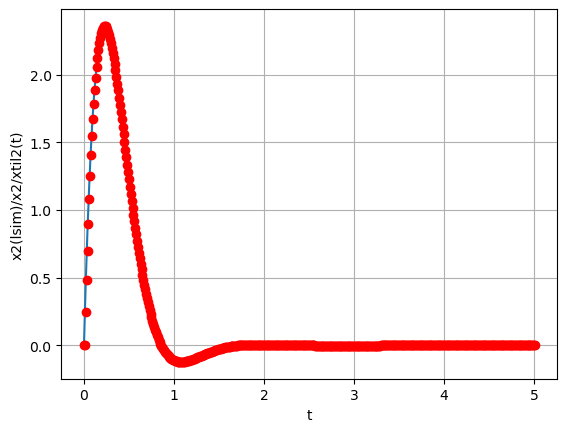

In [219]:
plt.figure()
plt.plot(t, x1b,k*T,x2,'*', k*T, xtil2, 'ro')
plt.xlabel("t")
plt.ylabel("x2(lsim)/x2/xtil2(t)")
plt.grid(True)
plt.show()

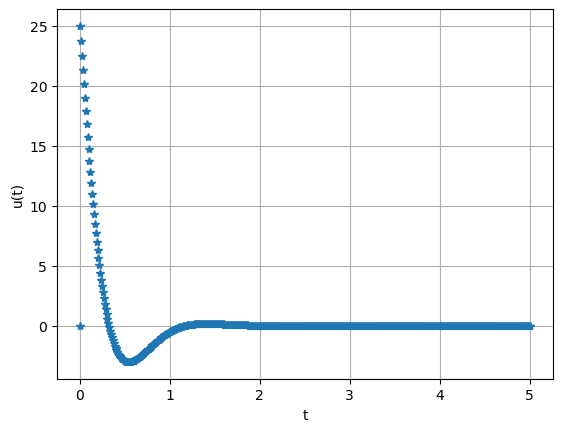

In [220]:
plt.figure()
plt.plot(k*T,u,'*')
plt.xlabel("t")
plt.ylabel("u(t)")
plt.grid(True)
plt.show()